In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

features = ['Year', 
            'Access to electricity (% of population)', 
            'Access to clean fuels for cooking',
            'Renewable energy share in the total final energy consumption (%)',
            'Electricity from renewables (TWh)', 
            'Low-carbon electricity (% electricity)',
            'Primary energy consumption per capita (kWh/person)', 
            'gdp_growth', 
            'gdp_per_capita']

In [3]:
df_latest_year = df[df['Year'] == 2019].dropna(subset=features)

features_latest_year = ['Access to electricity (% of population)', 'Access to clean fuels for cooking',
                        'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                        'Primary energy consumption per capita (kWh/person)', 'gdp_growth', 'gdp_per_capita']

scaler = StandardScaler()
df_clustering_scaled_latest = scaler.fit_transform(df_latest_year[features_latest_year])

kmeans_latest = KMeans(n_clusters=2, random_state=42)
df_latest_year['Cluster'] = kmeans_latest.fit_predict(df_clustering_scaled_latest)

countries_by_cluster_latest = df_latest_year[['Entity', 'Cluster']].groupby('Cluster')['Entity'].apply(list)

for cluster, countries in countries_by_cluster_latest.items():
    print(f"Cluster {cluster}:")
    print(countries)
    print("\n")


Cluster 0:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Djibouti', 'Eswatini', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'Sri Lanka', 'Sudan', 'Togo', 'Uganda', 'Vanuatu', 'Zambia', 'Zimbabwe']


Cluster 1:
['Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'El S

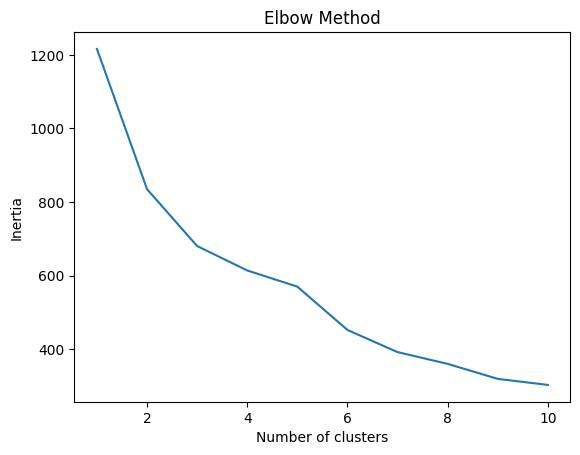

In [4]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering_scaled_latest)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
pd.DataFrame(kmeans_latest.cluster_centers_, columns=features_latest_year)

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),gdp_growth,gdp_per_capita
0,-1.077667,-1.232343,1.052794,-0.210518,0.182674,-0.656956,0.318301,-0.648313
1,0.560387,0.640818,-0.547453,0.109469,-0.094990,0.341617,-0.165516,0.337123


In [6]:
df = df.merge(df_latest_year[['Entity', 'Cluster']], on='Entity', how='left')

In [7]:
df['Cluster'] = df['Cluster'].astype('Int64')

In [8]:
# df[['Entity', 'Cluster Name']].value_counts(dropna=False)

In [9]:
df.sample(15)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Cluster
3604,Yemen,2018,62.000000,61.5,8.77,55730000.0,3.60,2.82,0.00,0.48,...,NaN,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388,<NA>
3121,Spain,2018,100.000000,100.0,NaN,NaN,17.42,112.23,55.77,103.88,...,2.77,257040.008500,18.230534,2.288786,30349.752100,94,505370.0,40.463667,-3.749220,1
542,Burkina Faso,2017,17.214043,9.0,4.15,20820000.0,69.08,1.48,0.00,0.16,...,4.72,4269.999981,NaN,6.203489,734.996268,76,274200.0,12.238333,-1.561593,0
3349,Tunisia,2015,99.900000,99.7,29.83,8880000.0,12.50,17.77,0.00,0.58,...,3.87,30479.999540,NaN,1.000181,4094.836287,76,163610.0,33.886917,9.537499,1
2984,Singapore,2015,100.000000,100.0,44.91,NaN,0.65,47.45,0.00,0.41,...,2.68,45430.000310,0.292372,2.988521,55646.618750,"8,358",716.0,1.352083,103.819836,1
1987,Madagascar,2012,18.700000,0.9,7.38,50000.0,83.40,0.95,0.00,0.75,...,6.48,2740.000010,NaN,3.011148,518.152813,48,587041.0,-18.766947,46.869107,0
2246,Myanmar,2005,47.321983,4.6,15.04,NaN,79.82,2.66,0.00,3.16,...,6.63,10720.000270,NaN,13.566942,216.311501,83,676578.0,21.916221,95.955974,0
607,Cameroon,2019,63.489880,22.2,30.59,7360000.0,79.41,2.99,0.00,5.36,...,4.33,9430.000305,NaN,3.475060,1533.095688,56,475440.0,7.369722,12.354722,0
3306,Tonga,2014,95.789700,69.5,16.48,2510000.0,1.70,0.05,0.00,0.00,...,2.68,109.999999,NaN,2.018700,4354.244360,147,747.0,-21.178986,-175.198242,1
200,Austria,2011,100.000000,100.0,NaN,NaN,31.64,21.35,0.00,40.91,...,3.10,68269.996640,30.720795,2.922797,51374.958410,109,83871.0,47.516231,14.550072,1


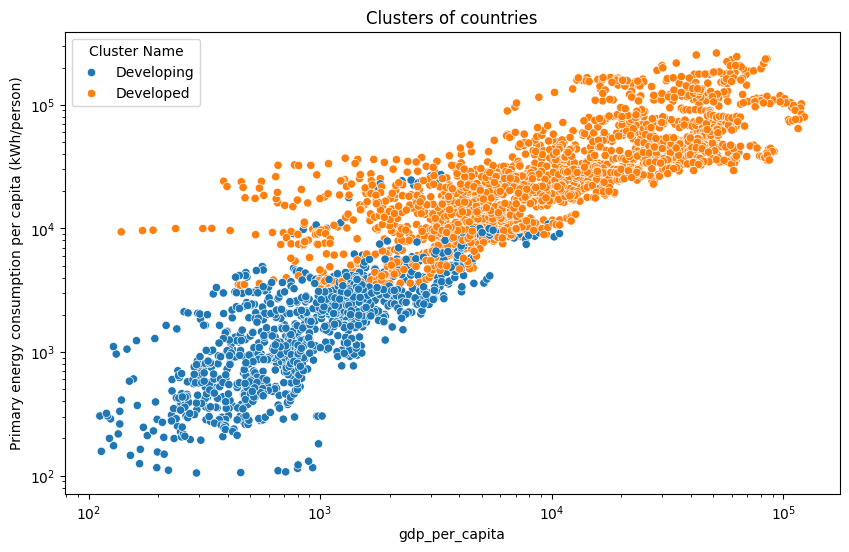

In [10]:
# name the clusters
df['Cluster Name'] = df['Cluster'].map({0: 'Developing', 1: 'Developed'})

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdp_per_capita', y='Primary energy consumption per capita (kWh/person)', hue='Cluster Name')
plt.xscale('log')
plt.yscale('log')
plt.title('Clusters of countries')
plt.show()

<Figure size 1000x600 with 0 Axes>

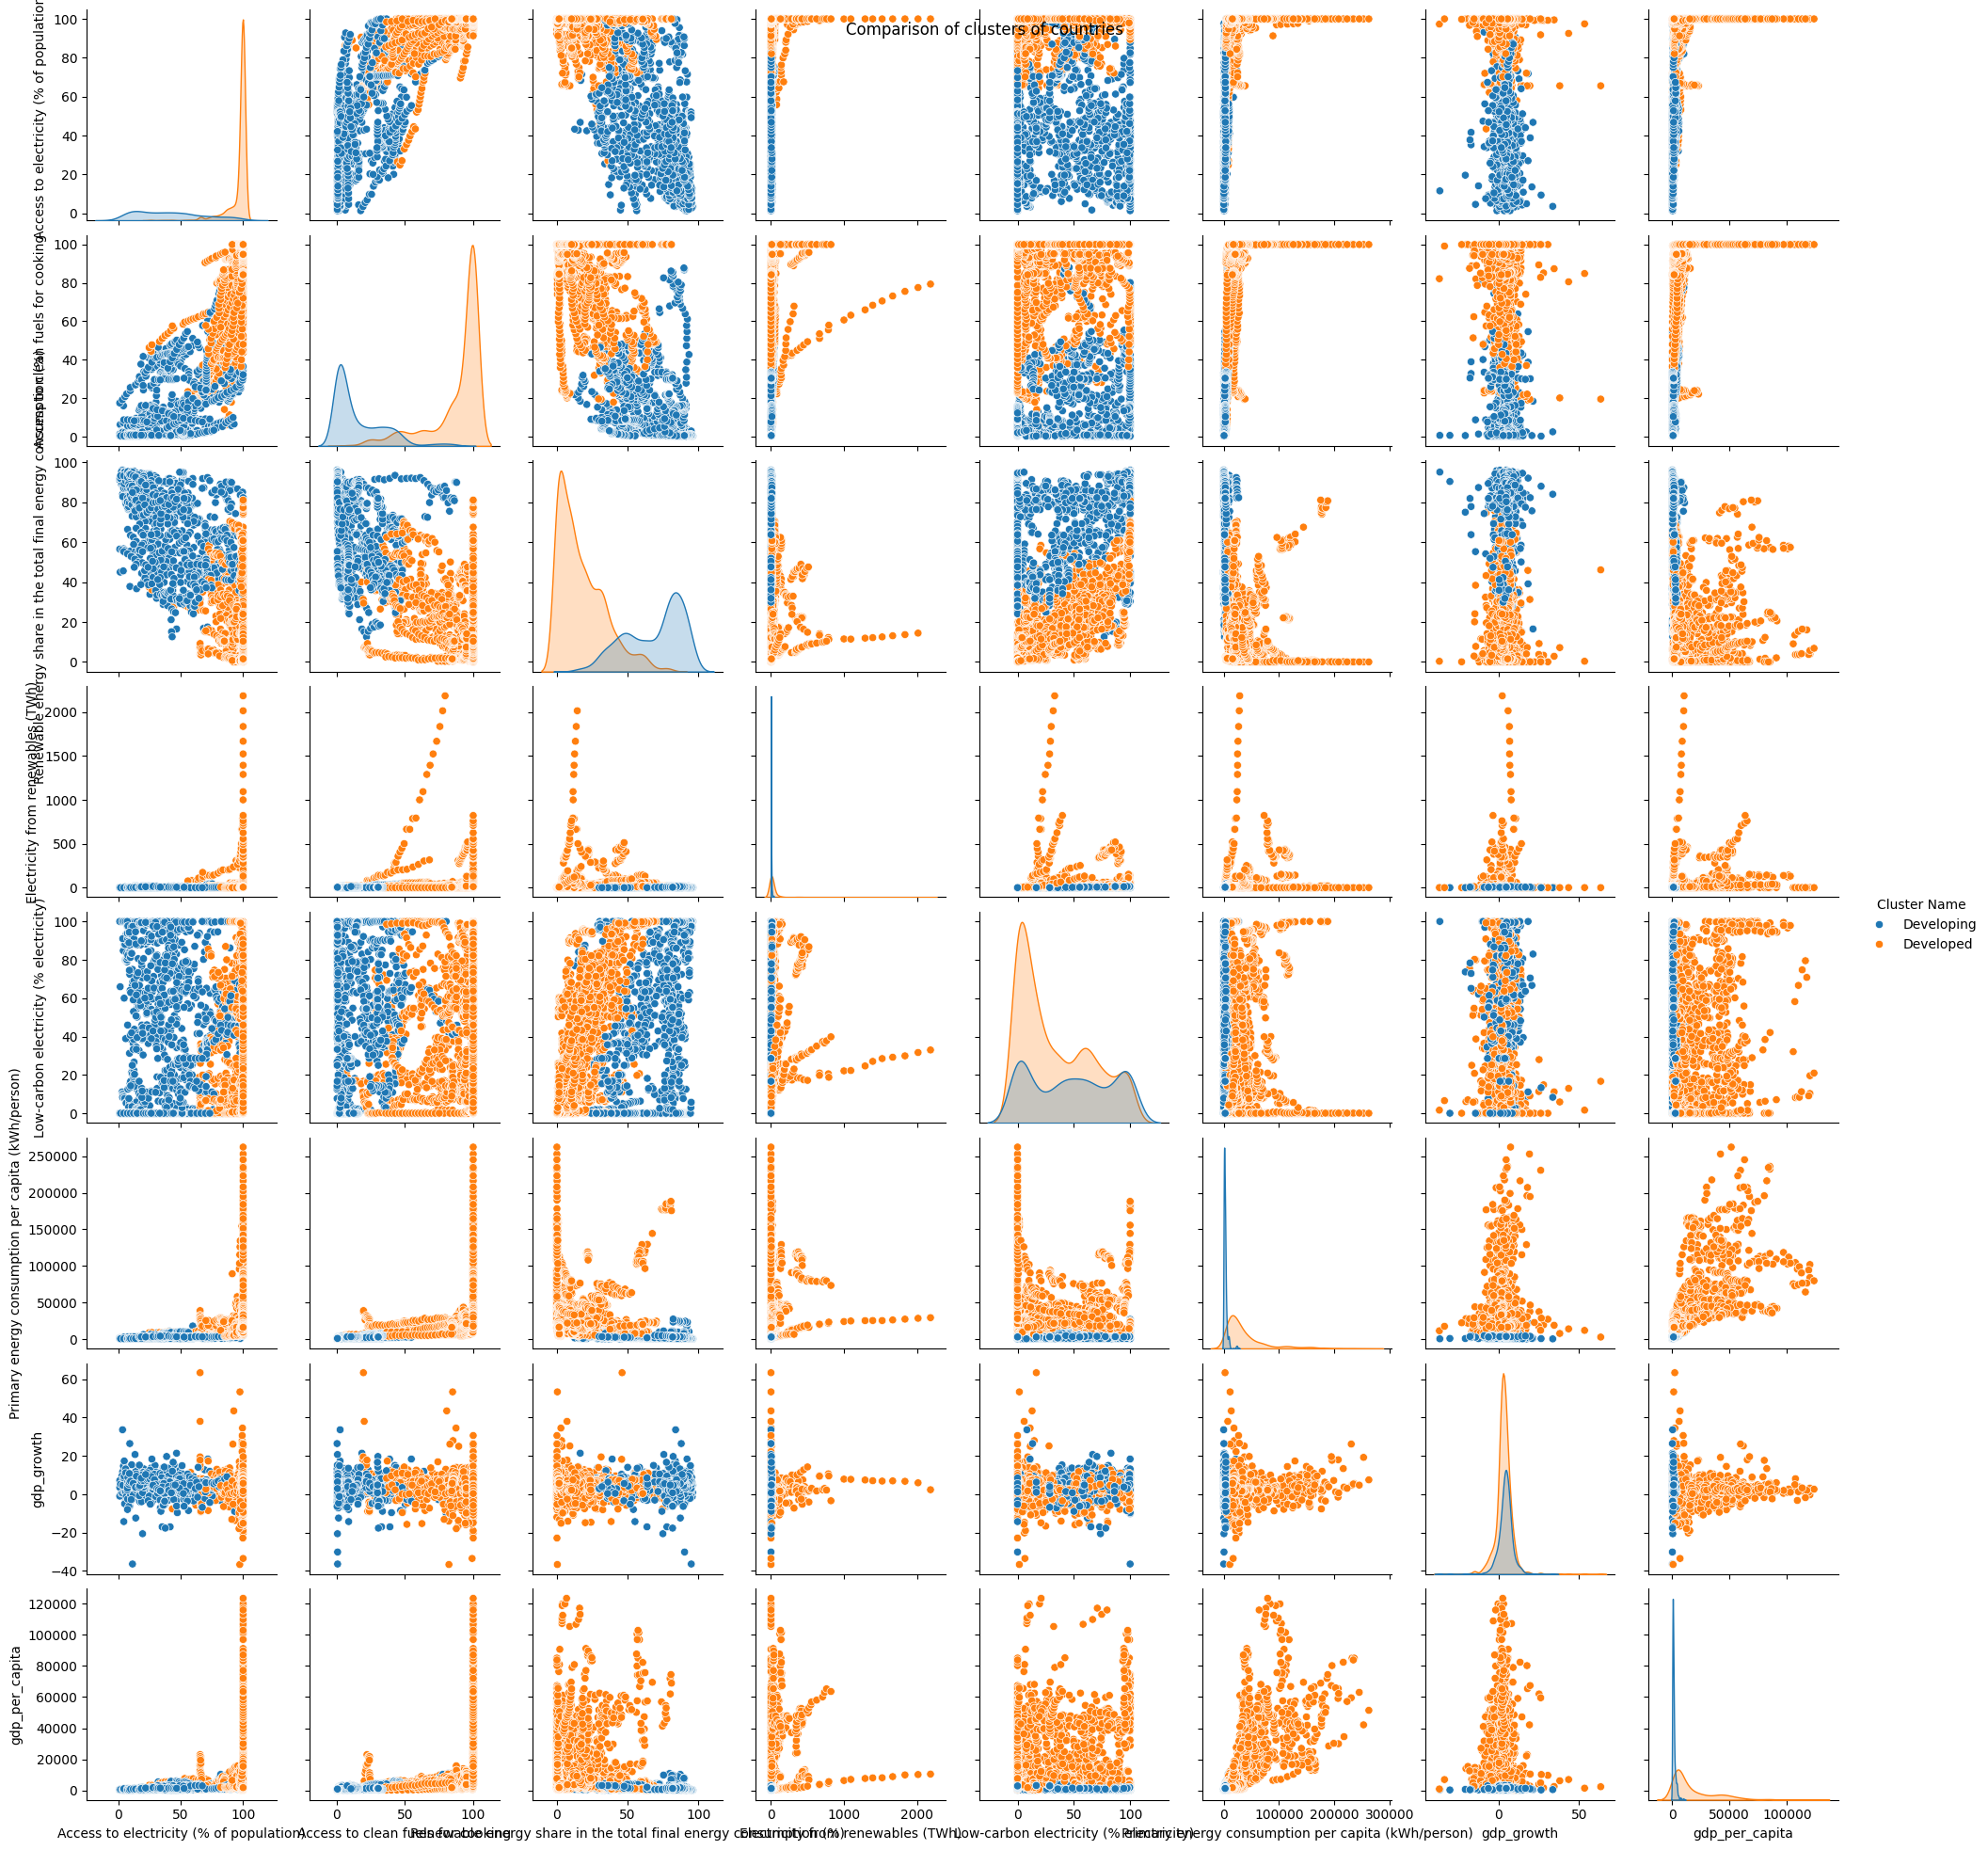

In [11]:
# plot the comparison of the clusters
plt.figure(figsize=(10, 6))
sns.pairplot(data=df, vars=features_latest_year, hue='Cluster Name')
plt.suptitle('Comparison of clusters of countries')
plt.show()

In [12]:
df.groupby('Cluster Name')[features_latest_year].describe()

Access to electricity (% of population)                       \
                                               count      mean        std   
Cluster Name                                                                
Developed                                     2086.0  96.43512   8.362770   
Developing                                    1083.0  41.68596  26.453007   

                                                                   \
                    min        25%         50%         75%    max   
Cluster Name                                                        
Developed     24.800000  97.793205  100.000000  100.000000  100.0   
Developing     1.252269  18.500000   38.697876   59.631488  100.0   

             Access to clean fuels for cooking             ... gdp_growth  \
                                         count       mean  ...        75%   
Cluster Name                                               ...              
Developed                               2086.0  87.675024  ...   5.360409   
Developing                              1092.0  15.789240  ...   6.430132   

                        gdp_per_capita                              \
                    max          count          mean           std   
Cluster Name                                                         
Developed     63.379875         2075.0  18267.069442  20475.979429   
Developing    33.629372         1076.0   1360.931393   1390.451247   

                                                                                
                     min          25%          50%           75%           max  
Cluster Name                                                                    
Developed     138.429147  4218.827551  9151.381732  26023.528780  123514.19670  
Developing    111.927225   506.515553   883.107085   1581.616229   10809.68495  

[2 rows x 64 columns]

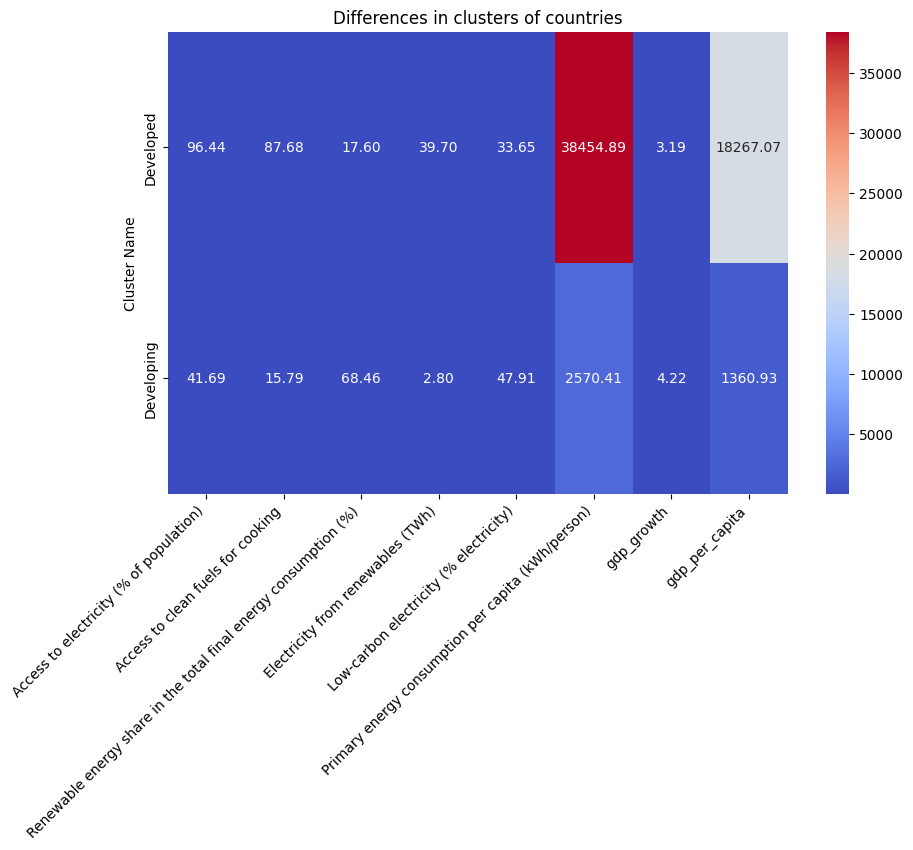

In [15]:
# plot differences in the clusters
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby('Cluster Name')[features_latest_year].mean(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Differences in clusters of countries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# df.to_csv('data/global-data-on-sustainable-energy-clustered.csv', index=False)